# ☎️ Telco Churn Predictions

## ✔️ Goals:
- Explore associations to churn and other customer data
- Predict probably a customer will churn (unsubscribe) from Telco utilizing machine learning models
- 

## 📦 Imports

In [1]:
# Modularization
import env
import os
import acquire
import prepare
import mods as m
# Ignore Warning - For Presentation
import warnings
# Array and Dataframes
import numpy as np
import pandas as pd
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Logistic Regression
from sklearn.linear_model import LogisticRegression as lr
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as dt, plot_tree, export_text
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
classification_report, confusion_matrix, ConfusionMatrixDisplay

## 🎣 Acquire

- Data had 37 columns, 7043 rows before preparation
- Columns are representative of data relative to demographics, services subscribed and payment/contract information
- Rows are representative of customers and their respective data 
 

## 🍱 Prepare
- Analyzed for null or duplicate data
- Encoded multicategorical type data with dummy columns
- Encoded binary categorical type data
- Dropped all useless dummy columns
- Normalized numerical data by dropping extra symbols and spaces, changed type to numeric type
- Snake case columns
- Split data for training, validate and test (repectively; ~60,~20,~20), stratified on 'churn'
- Assume no other changes

## 📒 Data Dictionary
--- 
| Feature        | Definition                                   |
| ---            | ---                                          |
| customer_id    | string; randomized 4 digit - 5 character identification code |
| gender         | string; male/female, determines account owner gender |
| senior_citizen | string; binary encoded, determines if account owner is a senior citizen |
| partner        | string; yes/no, determines if account owner has a partner |
| dependents     | string; yes/no, determines if account owner has any dependents |
| tenure         | integer; the number of years the customer has been with the company |
| phone_service  | string; yes/no/No phone service, multicategorical data to determine if the customer uses phone service |
| internet_service_type | str; DSL/Fiber optic/No internet service, multicategorical data to determine what internet service type is used by the customer |
| internet_service_type_id | int; 1/2/3, determines what type of internet service plan identifier the customer has |
| online_security| string; yes/no/No internet service, determines if the customer pays for the online security feature |
| online_backup  | string; yes/no determine if the customer has this feature |
| streaming_tv   | string; yes/no determine if the customer has this feature |
| streaming_movies | string; yes/no determine if the customer this feature |
| paperless_billing | string; yes/no determine if the customer has this feature|
| payment_type_id | integer; 1/2/3/4, determines what identifier for form of payment the customer utilizes |
| monthly_charges | integer; the amount the customer pays monthly |
| total_charges | integer; a total accumilation of what the customer has paid since beginning their service plan |
| churn | str; yes/no, determines whether or not a customer has churned, this is our target |
| payment_type | str; Mailed check/Electronic check/Credit card(automatic)/Credit card(manual), multicategorical data to determine the customer payment type in detail |
| contract_type | str; One year/Month-to-month/Two year, the type of contract type signed by the customer to determine length of service |
| Encoded dummy columns of respective categorical types above | N/A |

In [2]:
# combination of acquire & prepare in one function
telco = prepare.prep_telco()
# seperate data for training, validation and testing
train, validate, test = prepare.splitter(telco,target='churn')

Dataframe: (7043, 46) 100%

Train: (4507, 46) | ~60%
Validate: (1127, 46) | ~20%
Test: (1409, 46) | ~20%


## 🎞️ Data Preview

In [3]:
# view all columns with associated values to observe
pd.set_option('display.max_columns', None)

In [4]:
# random sample of data to examine
train.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_no_phone_service,multiple_lines_yes,online_security_yes,online_backup_yes,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,contract_type_one_year,contract_type_two_year,tech_support_yes,streaming_tv_yes,streaming_movies_yes,device_protection_yes,internet_service_type_fiber_optic,internet_service_type_none,contract_type_month_to_month
6458,8258-GSTJK,Male,1,No,No,3,Yes,Yes,2,No,No,No,No,No,No,1,Yes,1,77.00,237.75,Yes,Fiber optic,Electronic check,Month-to-month,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
5776,6259-WJQLC,Male,1,No,No,32,Yes,Yes,2,No,No,Yes,No,No,No,1,Yes,4,81.10,2619.25,No,Fiber optic,Credit card (automatic),Month-to-month,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1
4919,3878-AVSOQ,Female,1,No,No,1,Yes,No,2,No,No,No,No,No,No,1,Yes,1,71.25,71.25,No,Fiber optic,Electronic check,Month-to-month,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
6682,8909-BOLNL,Male,0,No,No,3,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,2,21.20,52.05,No,None,Mailed check,One year,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
5911,6674-KVJHG,Female,0,No,No,11,Yes,Yes,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,1,25.20,245.15,No,None,Electronic check,One year,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 3283 to 6331
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           4507 non-null   object 
 1   gender                                4507 non-null   object 
 2   senior_citizen                        4507 non-null   int64  
 3   partner                               4507 non-null   object 
 4   dependents                            4507 non-null   object 
 5   tenure                                4507 non-null   int64  
 6   phone_service                         4507 non-null   object 
 7   multiple_lines                        4507 non-null   object 
 8   internet_service_type_id              4507 non-null   int64  
 9   online_security                       4507 non-null   object 
 10  online_backup                         4507 non-null   object 
 11  device_protection  

## 🧭 Explore
Before further diving - a distributions review

### 🧭 Explore: Feature Engineering

In [6]:
# Compiling all additional services into a column that would measure the sum of services subscribed
train['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
validate['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
test['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)

In [7]:
# Function to loop through desired df and respective columns to visualize
cat_cols, num_cols = m.organize_columns(train)
# Compiled categorical columns
cat_cols = train[cat_cols]

### How many customers normally churn?

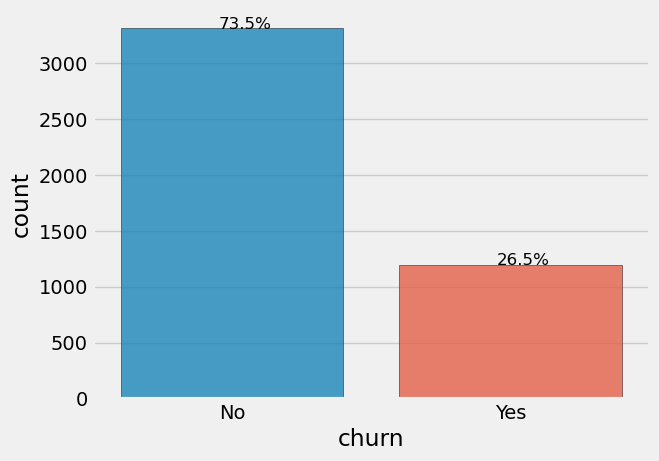

In [8]:
# Percentage of customers that churn ( also our baseline prediction )
ax = sns.countplot(data=train,x='churn',alpha=0.8,linewidth=.4,edgecolor='black')
m.without_hue(ax,train['churn'])

## The longer the customer has been with the company the less likely they are to churn due to ease of services and maybe a grandfathered payment price?


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *tenure*\
Null $H_a$: There *is* an association between *churn* & *tenure*

In [10]:
# Masking & defining our desired values
tenure_churned = train[train.churn == 'Yes']['tenure']
tenure_nochurn = train[train.churn == 'No']['tenure']

# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(tenure_churned,tenure_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {5.213539721523729e-130}


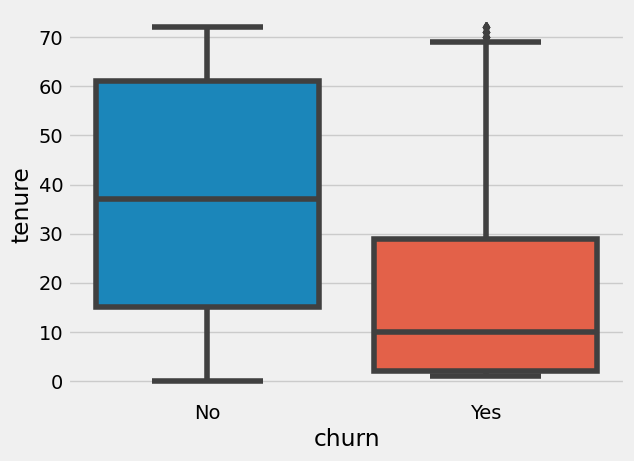

In [41]:
z = sns.boxplot(data=train,x='churn',y='tenure')


There is a **negative** correlation to tenure, meaning customers that have been with the company longer are likely to remain.

## If monthly payments are too high the customer will likely churn, due to seeing the service as too expensive.

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *monthly_charges*\
Null $H_a$: There *is* an association between *churn* & *monthly_charges*

In [15]:
train.groupby('churn')['monthly_charges'].mean()

monthly_churned = train[train.churn == 'Yes']['monthly_charges']
monthly_nochurn = train[train.churn == 'No']['monthly_charges']

# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(monthly_churned,monthly_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {1.481195740841378e-40}


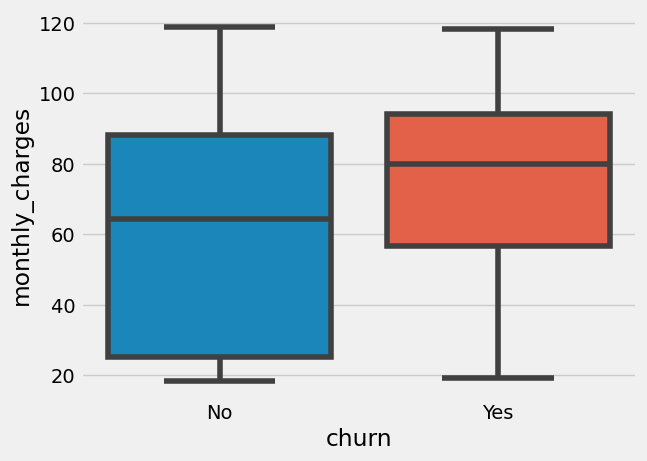

In [42]:
z = sns.boxplot(data=train,x='churn',y='monthly_charges')

## The customer's contract plan may be indicative of how long they intend to be with the provider considering this would lower their window to churn?

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & having a *month-to-month contract*\
Null $H_a$: There *is* an association between *churn* & having a *month-to-month contract*

In [11]:
# conduct statistical analysis of churn x contract_type_month_to_month
m.chi2_test(train['churn_binary'],train['contract_type_month_to_month'])

We can reject the null hypothesis with a p-score of: {7.035284556920665e-158}


contract_type_month_to_month,0,1
churn_binary,,
0,1861,1450
1,135,1061


There is a **positive** correlation to contract_type_month_to_month, this would be strongly indicative of an association between customer churn and contract type.

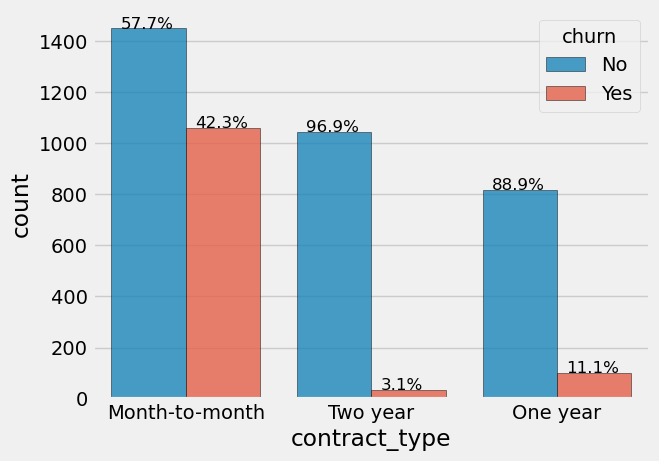

In [47]:
ax = sns.countplot(data=train,x='contract_type',hue='churn',alpha=0.8,linewidth=.4,edgecolor='black')
m.with_hue(ax,train.contract_type,3,2)

## Customers that are senior citizen may be less likely to churn due to complications with changing plans.

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between churn & senior citizens\
Null $H_a$: There *is* an association between churn & senior citizens

In [16]:
# conduct statistical analysis of churn x senior_citizen
m.chi2_test(train['churn'],train['senior_citizen'])

We can reject the null hypothesis with a p-score of: {2.7803174215206096e-25}


senior_citizen,0,1
churn,,
No,2888,423
Yes,888,308


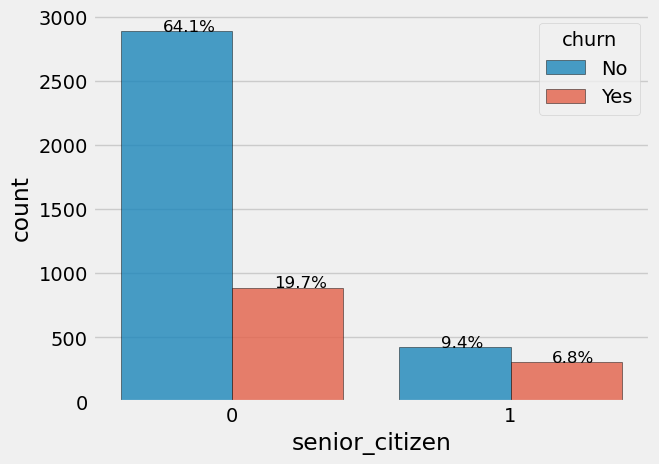

In [53]:
ax = sns.countplot(data=train,x='senior_citizen',hue='churn',alpha=0.8,linewidth=.4,edgecolor='black')
m.without_hue(ax,train.contract_type)